In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> IMDb Movie Assignment </font>

We have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, we will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data



First we will read the movies dataset

In [4]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

movies = pd.read_csv('Movie+Assignment+Data.csv')

- ###  Inspecting the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [5]:
# Check the number of rows and columns in the dataframe
movies.shape


(100, 62)

In [6]:
# Check the column-wise info of the dataframe
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [11]:
# Check the summary for the numeric columns 

numeric = ['int' , 'int32' , 'int64' , 'float' , 'float32' , 'float64']
numeric_columns = movies.select_dtypes(include =  numeric)
numeric_columns.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


##  Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###   Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [13]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

movies['budget'] = movies.budget/1000000


In [15]:
movies['Gross'] = movies.Gross/1000000

-  ###   Let's Talk Profit!

    1. We will create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what we observed.
    5. Extract the movies with a negative profit`

In [18]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column
movies['profit'] = movies.Gross - movies.budget


In [20]:
#Now we will sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'
movies = movies.sort_values(by = 'profit' , ascending = False)


In [24]:
# Top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

top_10 = movies[:10]

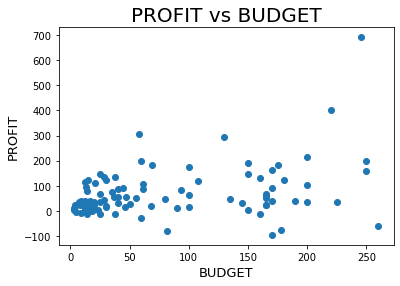

In [31]:
#Plot profit vs budget
plt.scatter(x =  movies.budget , y= movies.profit)
plt.xlabel('BUDGET' , fontsize =13)
plt.ylabel('PROFIT' , fontsize = 13)
plt.title('PROFIT vs BUDGET'  , fontsize  =20)
plt.show()


The dataset contains the 100 best performing movies from the year 2010 to 2016. However, the scatter plot tells a different story. We can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. Lets have a closer look at this by finding the movies with negative profit.

In [35]:
# movies with negative profit
neg_profit = movies[movies.profit < 0]
neg_profit

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
99,Tucker and Dale vs Evil,2010,5.0,0.223838,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,...,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-4.776162
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594629
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848


- ###  The General Audience and the Critics

We have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, we also have another column `IMDb_rating` which tells us the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, we will find out the highest rated movies which have been liked by critics and audiences alike.

1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10.        First we will convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, we    need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic`         columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to or greater than       `8` and store these movies in a new dataframe .
    

In [38]:
# Change the scale of MetaCritic
movies['MetaCritic'] = movies.MetaCritic/10


In [45]:
# Find the average ratings
movies['Avg_rating'] = (movies.MetaCritic + movies.IMDb_rating)/2


In [241]:
#Sort in descending order of average rating

movies.sort_values(by = 'Avg_rating' , ascending = False)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,...,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,IFUS,Total_likes
94,Boyhood,2014,4.0,25.359200,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,7.9,Drama,NaN,NaN,10.0,165,49673,62055,76838,52238,23789,10431,...,7.7,8.1,8.1,8.0,8.1,8.1,7.8,7.8,7.8,7.6,7.7,7.7,7.7,7.2,8.0,7.9,R,USA,21.359200,8.95,USA,550.0
69,12 Years a Slave,2013,20.0,56.667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,8.1,Biography,Drama,History,9.6,134,75556,126223,161460,83070,27231,9603,...,8.1,8.4,8.4,8.5,8.2,8.2,8.2,8.0,7.9,8.0,7.8,7.8,8.1,7.7,8.3,8.0,R,USA,36.667870,8.85,USA,3160.0
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,8.2,Animation,Adventure,Comedy,9.4,95,87509,113244,119801,67153,24210,8542,...,8.2,8.4,8.4,8.3,8.3,8.3,8.3,8.1,8.1,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367,8.80,USA,2151.0
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,9.3,128,74245,71191,64640,38831,17377,8044,...,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803,8.75,USA,33000.0
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,Animation,Adventure,Comedy,9.2,103,139773,149992,158704,88289,31291,11850,...,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,8.75,USA,16721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,The Hobbit: An Unexpected Journey,2012,180.0,303.001229,Aidan Turner,Adam Brown,James Nesbitt,5000,972.0,773.0,7.9,Adventure,Fantasy,NaN,NaN,169,135848,132202,191128,122538,51765,19699,...,8.1,8.0,7.9,8.3,8.0,8.0,8.2,7.7,7.7,7.9,7.7,7.6,8.0,7.5,7.8,7.8,PG-13,USA,123.001229,NaN,USA,6745.0
52,Lone Survivor,2013,40.0,125.069696,Jerry Ferrara,Scott Elrod,Dan Bilzerian,480,449.0,127.0,7.5,Action,Biography,Drama,NaN,121,30856,33356,68808,54195,20772,7205,...,7.7,7.9,7.9,8.3,7.7,7.7,7.8,7.3,7.3,7.6,7.5,7.4,7.8,6.8,7.8,7.3,R,USA,85.069696,NaN,USA,1056.0
71,The Book Thief,2013,19.0,21.483154,Emily Watson,Sophie NÃ©lisse,Roger Allam,876,526.0,326.0,7.6,Drama,War,NaN,NaN,131,15911,17607,32570,24461,10274,3848,...,7.9,8.0,7.6,8.5,7.7,7.6,8.0,7.3,7.2,7.7,7.6,7.5,8.0,6.6,7.6,7.5,PG-13,USA,2.483154,NaN,USA,1728.0
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,7.7,Comedy,Drama,Romance,NaN,124,11354,11050,20808,14372,5412,1848,...,7.9,8.0,7.6,8.3,7.9,7.8,8.0,7.5,7.5,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786,NaN,USA,2639.0


In [1]:
# Find the movies with metacritic-Imdb rating < 0.5 and also with an average rating of >= 8 (sorted in descending order)

(movies.MetaCritic - movies.IMDb_rating) < 0.5


- ### Now we will try to find the Most Popular Trios - I

Let's take a hypothetical situation and based on that we will perform our analysis

We are producer looking to make a blockbuster movie. There will primarily be three lead roles in our movie and we wish to cast the most popular actors for it. Now, since we don't want to take a risk, we will cast a trio which has already acted in together in a movie before. The metric that we've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help us out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [224]:

movies['Total_likes'] = movies.loc[: ,['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']].sum(axis=1)
top_5_likes = movies.sort_values(by = ['Total_likes'] , axis = 0 , ascending = False).head(5)
top_5_likes_actors = top_5_likes[['actor_1_name' , 'actor_2_name' , 'actor_3_name']]
top_5_likes_actors = top_5_likes_actors.values.tolist()
top_5_likes_actors

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

- ### Now we will do Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. We will plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

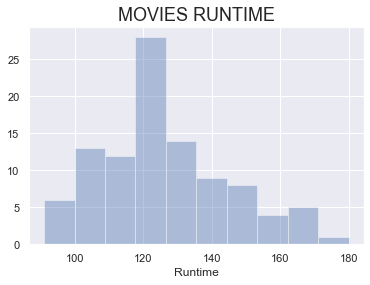

In [66]:
# Runtime histogram/density plot
sns.set_theme()
sns.distplot(movies.Runtime , kde = False)
plt.title('MOVIES RUNTIME' , fontsize  = 18)
plt.show()

- ### R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, We will find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe and store these in a dataframe named `PopularR`.

In [ ]:

R_ratings = movies[movies['content_rating'] =='R']
PopularR = R_ratings.sort_values(by = 'CVotesU18' , ascending = False)
PopularR


##  Demographic analysis

If we take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, we made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###   Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, we will aggregate a few values over these 3 columns. 
1. First create a new dataframe  that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called ` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that we have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets us do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column  on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [326]:
# Create the dataframe df_by_genre
df_by_genre = movies[['genre_1', 'genre_2', 'genre_3', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS']]


In [327]:
# Create a column cnt and initialize it to 1
df_by_genre['cnt'] = 1


In [328]:
# Group the movies by individual genres
df_by_g1 = df_by_genre.groupby('genre_1').sum()
df_by_g2 =df_by_genre.groupby('genre_2').sum()
df_by_g3 = df_by_genre.groupby('genre_3').sum()


In [329]:
# Add the grouped data frames and store it in a new data frame
g1_g2 = df_by_g1.add(df_by_g2 , fill_value = 0)
df_add = g1_g2.add(df_by_g3 , fill_value = 0)

In [331]:
# Extract genres with atleast 10 occurences
genres_top10  = df_add[df_add.cnt >= 10]


In [332]:
# Take the mean for every column by dividing with cnt 
genres_top10 = pd.concat([genres_top10.iloc[: , 0:44].div(genres_top10.cnt , axis = 'rows') , genres_top10.cnt] , axis = 1)


In [333]:
# Rounding off the columns of Votes to two decimals
votes_round = genres_top10.iloc[: , 27:-1].round(2)

In [334]:
# Converting CVotes to int type
cvotes_int = genres_top10.iloc[: , :28].astype(int)
genres_top10 = pd.concat([ cvotes_int ,votes_round , genres_top10['cnt']] , axis =  'columns')


In [341]:
genres_top10.reset_index(inplace = True)

In [343]:
genres_top10.rename(columns = {'index' : 'genres'} , inplace = True)


If we take a look at the final dataframe that we have gotten, we will see that we now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###   Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

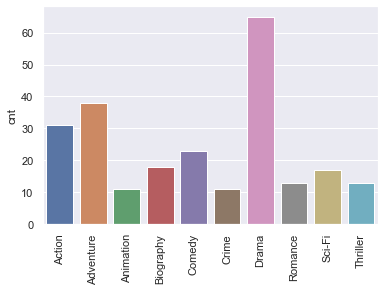

In [294]:
# Countplot for genres

sns.barplot(x = genres_top10.index , y = genres_top10.cnt)
plt.xticks(rotation = 90)
plt.show()

-  ###   Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. We will make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 


We will use the below link 
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot



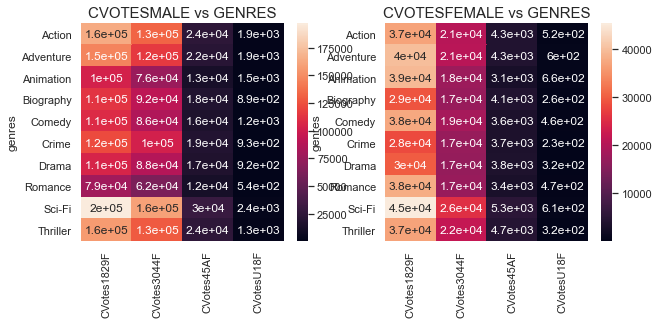

In [377]:
# 1st set of heat maps for CVotes-related columns
fig , ax =  plt.subplots(1,2  , figsize =  [10,4] , sharex =  True)
males = genres_top10[['CVotesU18M','CVotes1829M', 'CVotes3044M', 'CVotes45AM']]
male_val = pd.pivot_table(data = males , index = genres_top10['genres'])
sns.heatmap(ax = ax[0] , data = male_val , annot = True)
ax[0].set_title('CVOTESMALE vs GENRES' , fontsize =15)

females = genres_top10[['CVotesU18F','CVotes1829F', 'CVotes3044F', 'CVotes45AF']]
female_val = pd.pivot_table(data = females , index = genres_top10['genres'])
sns.heatmap(ax = ax[1] , data = female_val , annot = True)
ax[1].set_title('CVOTESFEMALE vs GENRES' , fontsize =15)
plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that we have plotted:


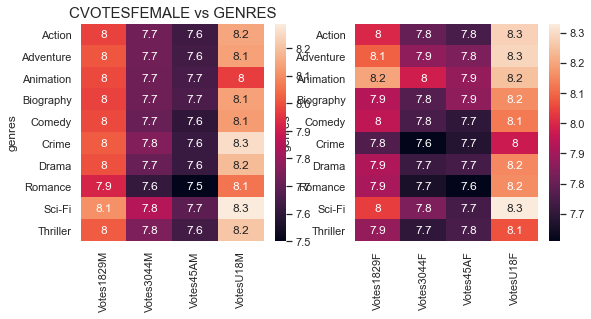

In [406]:
# 2nd set of heat maps for Votes-related columns
fig , ax = plt.subplots(1,2 , figsize =[9,4])
males_vote = genres_top10[['VotesU18M','Votes1829M', 'Votes3044M', 'Votes45AM']]
males_pivot = pd.pivot_table(data =  males_vote , index = genres_top10['genres'])
sns.heatmap(ax = ax[0],data = males_pivot ,annot = True)
ax[0].set_title('VOTESMALE vs GENRES' , fontsize =15)


males_vote = genres_top10[['VotesU18F','Votes1829F', 'Votes3044F', 'Votes45AF']]
males_pivot = pd.pivot_table(data =  males_vote , index = genres_top10['genres'])
sns.heatmap(ax = ax[1],data = males_pivot ,annot = True)
ax[0].set_title('CVOTESFEMALE vs GENRES' , fontsize =15)
plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:


-  ###   US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Now we will create a column `IFUS` . The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now we will make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. We will make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


 Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [189]:
# Creating IFUS column
movies['IFUS'] =''
usa_movies = movies[movies['Country'] =='USA']
usa_movies['IFUS'] ='USA'
non_usa_movies = movies[movies['Country'] !='USA']
non_usa_movies['IFUS'] = 'non-USA'
movies = pd.concat([usa_movies, non_usa_movies] , axis = 'rows')

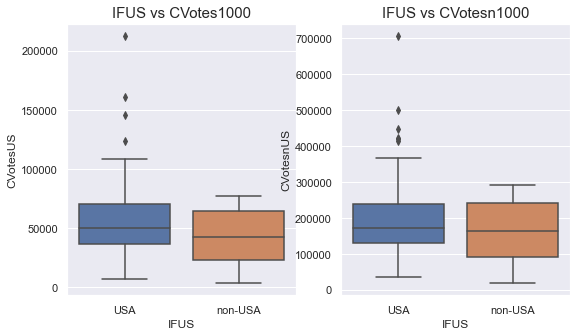

In [222]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)
fig ,ax = plt.subplots(1,2 , sharey =   False , figsize = [9,5])
sns.boxplot(ax= ax[0] ,  x = movies.IFUS  , y  = movies.CVotesUS)
ax[0].set_title('IFUS vs CVotes1000' , fontsize =15)
sns.boxplot(ax= ax[1] ,  x = movies.IFUS  , y  = movies.CVotesnUS)
ax[1].set_title('IFUS vs CVotesn1000' , fontsize =15)
plt.show()


.

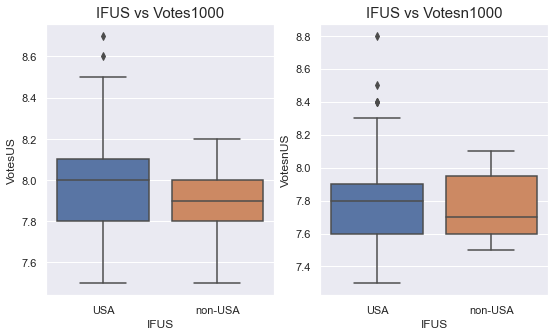

In [221]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
fig ,ax = plt.subplots(1,2 , sharex =   True , figsize = [9,5])
sns.boxplot(ax= ax[0] ,  x = movies.IFUS  , y  = movies.VotesUS)
ax[0].set_title('IFUS vs Votes1000' , fontsize =15)
sns.boxplot(ax= ax[1] ,  x = movies.IFUS  , y  = movies.VotesnUS)
ax[1].set_title('IFUS vs Votesn1000' ,fontsize =15)
plt.show()


**`Inferences:`** Write your two inferences/observations below:
- Inference 1:
- Inference 2:

-  ### Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. We will sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [283]:
# Sorting by CVotes1000
sorted_cvotes = genres_top10.sort_values(by ='CVotes1000' , ascending = 'False')

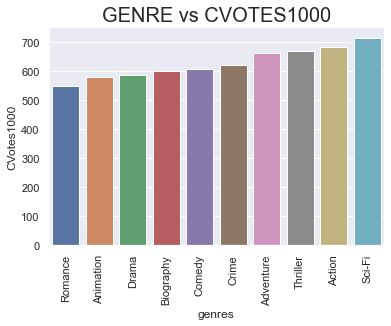

In [285]:
# Bar plot
sns.barplot(sorted_cvotes['genres'] , sorted_cvotes.CVotes1000)
plt.xticks(rotation =90)
plt.title('GENRE vs CVOTES1000' , fontsize =20)
plt.show()